Since the amount of the antibody in normal tissue indicates how much of it the rat actually received, a key measure of the effectiveness of transmission across the blood-brain barrier is the ratio of the antibody concentration in the brain tumor to the antibody concentration in normal tissue outside the brain.  The brain tumor concentration divided by the liver concentration is a measure of the amount of the antibody that reached the brain relative to the amount of it that reaeched other parts of the body.  This is the response variable.  The explanatory variables comprise two two categories:  *design variables* are those that describe manipulation by the researcher; *covariates* are those measuring characteristics of the subjects that were not controllable by the researcher.

Was the antibody concentration in the brain tumor increased by the use of the blood-brain barrier disruption infusion?  If so, by how much?  Do the answers to these two questions depend on the length of time after the infusion (from $\frac{1}{2}$ to 72 hours)?  What is the effect of treatment on antibody concentration after weight loss, total tumor weight, and the other covariates are accounted for?

In [1]:
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
import statsmodels.formula.api as smf

sns.set()

We begin by reading the data and summarizing the variables.

In [19]:
path = pathlib.Path.home() / 'data' / 'sleuth3' / 'case1102.csv'
df = pd.read_csv(path)
df.head()

,Brain,Liver,Time,Treatment,...,Sex,Weight,Loss,Tumor
0,41081,1456164,0.5,BD,...,Female,239,5.9,221
1,44286,1602171,0.5,BD,...,Female,225,4.0,246
2,102926,1601936,0.5,BD,...,Female,224,-4.9,61
3,25927,1776411,0.5,BD,...,Female,184,9.8,168
4,42643,1351184,0.5,BD,...,Female,250,6.0,164


In [20]:
df['Concentration Ratio'] = df['Brain'] / df['Liver']
df.loc[df.Treatment == 'BD', 'Treatment'] = 'Barrier Disruption'
df.loc[df.Treatment == 'NS', 'Treatment'] = 'Saline Control'

In [21]:
summary = df.describe()
summary

,Brain,Liver,Time,Days,Weight,Loss,Tumor,Concentration Ratio
count,34.000000,3.400000e+01,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,39965.294118,6.687764e+05,23.514706,10.029412,241.647059,3.638235,182.911765,1.503638
std,30326.107767,6.869928e+05,28.795645,0.459598,27.494222,4.242642,103.432709,2.347845
min,1334.000000,9.280000e+02,0.500000,9.000000,184.000000,-4.900000,25.000000,0.010273
25%,19281.250000,1.621000e+04,1.125000,10.000000,225.250000,1.200000,136.250000,0.033731
50%,32572.500000,6.439650e+05,3.000000,10.000000,239.500000,3.950000,166.000000,0.119314
75%,50653.750000,1.318557e+06,24.000000,10.000000,259.000000,5.975000,223.250000,1.951640
max,123730.000000,1.790863e+06,72.000000,11.000000,298.000000,12.800000,484.000000,8.545389


Text(0, 0.5, 'Tumor-to-Liver Concentration Ratio')

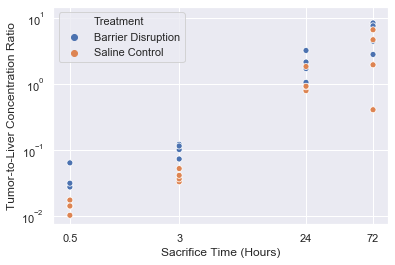

In [22]:
ax = sns.scatterplot(x='Time', y='Concentration Ratio',
                     hue='Treatment', 
                     data=df)
ax.set_xscale('log')
xticks = [0.5, 3, 24, 72]
ax.set_xticks(xticks)
ax.set_xticklabels([str(x) for x in xticks])
ax.set_yscale('log')
ax.set_ylim(0.0075, 15)
ax.set_xlabel('Sacrifice Time (Hours)')
ax.set_ylabel('Tumor-to-Liver Concentration Ratio')

# Statistical Conclusion
The median antibody concentration in the tumor (relative to that in the liver) was estimated to be 2.22 times as much for rats receiving the barrier disruption infusion than for those receiving the control infusion (95% confidence interval, from 1.56 to 3.15 times as much).  This multiplicative effect appears to be constant between 1/2 and 72 hours after the infusion (the $p$-value for a test of interaction between treatment and sacrifice time is 0.92 , from an $F$-test on 3 and 26 degrees of freedom.


# Scope of Inference
One hitch in this study is that randomization was not used to assign rats to treatment groups.  This oversight raises the possibility that the estimated relationships might be related to confounding variables over which the experimenter exercised no control.  Including the measured covariates in the model helps alleviate some concern, and the results appear to no have been affected by these potential confounding variables.  Nevertheless, causal implications can only be justified on the tenuous assumption that the assignment method used was as effect-neutral as a random assignment would have been.